In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data = pd.read_csv('/content/deliveries.csv')

In [ ]:
data.head(11)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
5,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,6,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
6,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,7,BB McCullum,P Kumar,SC Ganguly,0,1,1,legbyes,0,NaN,NaN,NaN
7,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,BB McCullum,Z Khan,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
8,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN
9,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN


# 1. How many matches, innings, overs, and deliveries are in the dataset?

In [72]:
print('Total matches:', data['match_id'].nunique()) #nunique()= number of unique values in a datafame column


Total matches: 1095


In [73]:
print("total matches  :",len(data['match_id'].unique())) #

total matches  : 1095


In [74]:
# to check total inning based on unique match id
a = data['inning'].groupby(data['match_id']).unique()
print(a)

match_id
335982     [1, 2]
335983     [1, 2]
335984     [1, 2]
335985     [1, 2]
335986     [1, 2]
            ...  
1426307    [1, 2]
1426309    [1, 2]
1426310    [1, 2]
1426311    [1, 2]
1426312    [1, 2]
Name: inning, Length: 1095, dtype: object


In [75]:
# to check total inning based on unique match id
a = data['inning'].groupby(data['match_id']).unique()
innings_per_match = a.apply(len)                            # allpy()=Applies a function to each value.
# display(innings_per_match[innings_per_match == 1])          #  match paly  1inning=3
# display(innings_per_match[innings_per_match == 2])           #  match play 2 inning= 1078
#display(innings_per_match[innings_per_match == 0])            # match play 0 inning =0
a = len(innings_per_match[innings_per_match == 1])
b = len(innings_per_match[innings_per_match == 2])
print("total inning   :", (a + (b * 2)))

total inning   : 2159


In [76]:
a = data['over'].groupby(data['match_id']).unique()

over_per_match = a.apply(len)
#display(over_per_match)
print( " total over :",over_per_match.sum() *2)

 total over : 43434


In [77]:
# to check howmuch ball deliver in the an over
a = data['over'].groupby(data['ball']).unique()
a


,over
ball,
1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
5,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
7,"[0, 3, 12, 14, 2, 6, 8, 9, 1, 5, 13, 7, 4, 15,..."
8,"[6, 8, 12, 5, 13, 1, 11, 3, 0, 10, 18, 7, 2, 1..."
9,"[11, 10, 6, 1, 16, 5, 19, 0, 18, 3, 17, 4, 14,..."


In [78]:
print("total deliveries  : ",len(data[data['ball'] >0]))


total deliveries  :  260920


#2.How many unique teams have batted and bowled?

In [79]:
print("total batting team  :",len(data['batting_team'].unique()))
print("total bowling  team  :",len(data['bowling_team'].unique()))



total batting team  : 19
total bowling  team  : 19


#3.Which columns contain missing values and what percentage are missing?

In [80]:
# to check which columns have missing values
data.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [81]:
print("% of missing values in extreas_types  :",(data['extras_type'].isnull().sum())/(len(data['extras_type']))*100)
print("% of missing values in player_dismissed  :",(data['player_dismissed'].isnull().sum())/(len(data['player_dismissed']))*100)
print("% of missing values in dismissal_kind  :",(data['dismissal_kind'].isnull().sum())/(len(data['dismissal_kind']))*100)
print("% of missing values in  fielder  :",(data['fielder'].isnull().sum())/(len(data['fielder']))*100)


% of missing values in extreas_types  : 94.58646328376514
% of missing values in player_dismissed  : 95.03679288670857
% of missing values in dismissal_kind  : 95.03679288670857
% of missing values in  fielder  : 96.41499310133375


#4.How many unique batters, bowlers, and fielders are present?

In [82]:
print("total no batters  :",len(data['batter'].unique()))
print("total no bowlers  :",len(data['bowler'].unique()))
print("total no fielers  :",len(data['fielder'].unique()))

total no batters  : 673
total no bowlers  : 530
total no fielers  : 608


#5.What are the different types of dismissals recorded?\

In [83]:

print("different types of dismissals recorded  :",data['dismissal_kind'].unique())

different types of dismissals recorded  : [nan 'caught' 'bowled' 'run out' 'lbw' 'retired hurt' 'stumped'
 'caught and bowled' 'hit wicket' 'obstructing the field' 'retired out']


#6. Which batsmen have scored the most total runs?


In [84]:
batsman_runs = data.groupby('batter')['batsman_runs'].sum()
highest_run_scorers= batsman_runs.sort_values(ascending=False).head(5)
print(highest_run_scorers)


batter
V Kohli      8014
S Dhawan     6769
RG Sharma    6630
DA Warner    6567
SK Raina     5536
Name: batsman_runs, dtype: int64


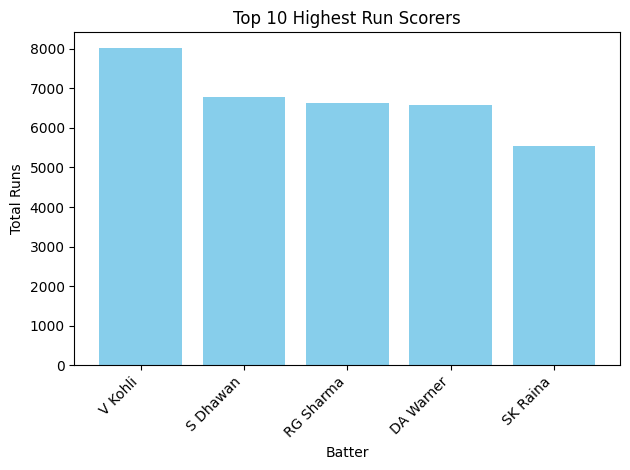

In [85]:
plt.bar(highest_run_scorers.index, highest_run_scorers.values, color='skyblue')
plt.xlabel('Batter')
plt.ylabel('Total Runs')
plt.title('Top 10 Highest Run Scorers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#7.Who has hit the most boundaries (4s and 6s)?

### Calculate Most Boundaries (4s and 6s)

In [86]:
# Filter for boundaries (4s and 6s)
boundaries = data[data['batsman_runs'].isin([4, 6])]     # each element is contained in a specified set of values. It returns
                                                           #a boolean Series (or DataFrame) that is True

# Group by batter and count the boundaries
boundary_counts = boundaries.groupby('batter')['batsman_runs'].count()

# Sort in descending order and get the top 10
top_boundary_hitters = boundary_counts.sort_values(ascending=False).head(10)

print("Top 10 Batters with Most Boundaries (4s and 6s):")
print(top_boundary_hitters)

Top 10 Batters with Most Boundaries (4s and 6s):
batter
V Kohli           981
S Dhawan          921
DA Warner         899
RG Sharma         880
CH Gayle          767
SK Raina          710
AB de Villiers    667
RV Uthappa        663
KD Karthik        627
MS Dhoni          615
Name: batsman_runs, dtype: int64


### Visualize Top Boundary Hitters

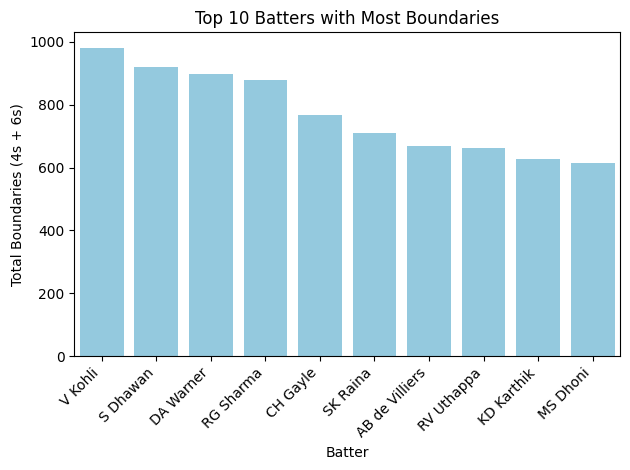

In [87]:
sns.barplot(x=top_boundary_hitters.index, y=top_boundary_hitters.values, color='skyblue')
plt.xlabel('Batter')
plt.ylabel('Total Boundaries (4s + 6s)')
plt.title('Top 10 Batters with Most Boundaries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#8. Which batter has the highest strike rate ?


In [88]:
# to calculate the score the run by batter
total_runs = data.groupby('batter')['batsman_runs'].sum()

# to calculate the total ball played
total_ball= data.groupby('batter')['ball'].count()

# to calculate the strike rate
strike_rate = (total_runs / total_ball) * 100

# to calculte highest strike rate
highest_strike_rate = strike_rate.sort_values(ascending=False).head(10)
print("highest strike rate  :", highest_strike_rate)


highest strike rate  : batter
L Wood             300.000000
B Stanlake         250.000000
J Fraser-McGurk    220.000000
R Sai Kishore      216.666667
Umar Gul           205.263158
RS Sodhi           200.000000
Shahid Afridi      176.086957
I Malhotra         175.000000
WG Jacks           172.932331
PD Salt            169.610390
dtype: float64


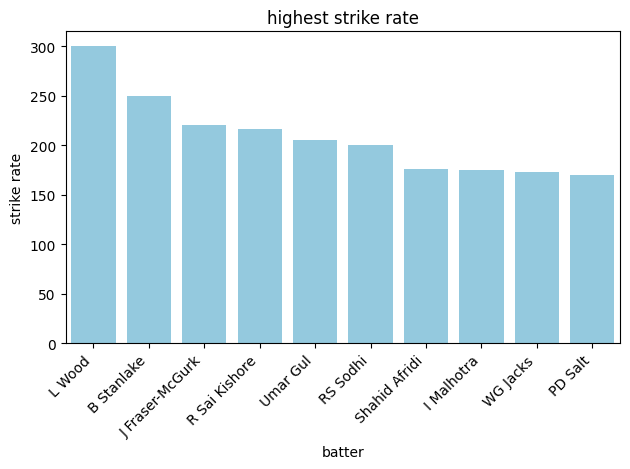

In [89]:
sns.barplot(x=highest_strike_rate.index, y=highest_strike_rate ,color='skyblue')
plt.xlabel('batter')
plt.ylabel('strike rate')
plt.title('highest strike rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#9. What is the distribution of runs per delivery (dot balls, singles, 2s, 3s, 4s, 6s)?


In [90]:
# Calculate the distribution of total runs per delivery
ball_distributions = data['total_runs'].value_counts().sort_index()



print("Distribution of runs per delivery:")
print(ball_distributions)

Distribution of runs per delivery:
total_runs
0     90438
1    108440
2     17323
3       922
4     30221
5       524
6     12964
7        88
Name: count, dtype: int64


In [91]:
# Filter to include only specified runs (0, 1, 2, 3, 4, 5, 6) if desired
# If other runs (e.g., 7 due to extras) are also present and desired, remove the filter
ball_distributions = ball_distributions[ball_distributions.index.isin([0, 1, 2, 3, 4, 5, 6])]

print("Distribution of runs per delivery:")
print(ball_distributions)

Distribution of runs per delivery:
total_runs
0     90438
1    108440
2     17323
3       922
4     30221
5       524
6     12964
Name: count, dtype: int64


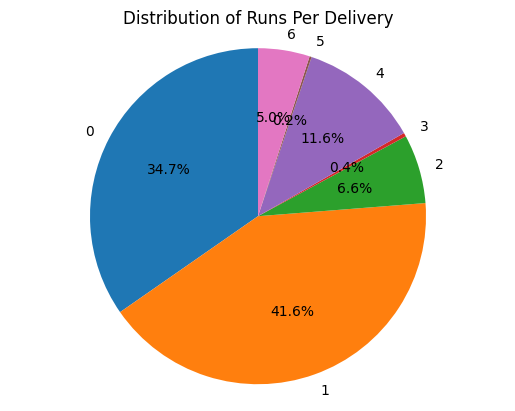

In [92]:
plt.pie(ball_distributions, labels=ball_distributions.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Runs Per Delivery')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#10.Which batters have scored the most runs against each team?

In [93]:
runs_against_each_team = data.groupby(['bowling_team', 'batter'])['batsman_runs'].sum().reset_index()
print(runs_against_each_team.head())

          bowling_team          batter  batsman_runs
0  Chennai Super Kings  A Ashish Reddy            45
1  Chennai Super Kings        A Badoni           101
2  Chennai Super Kings        A Kumble             3
3  Chennai Super Kings       A Manohar            12
4  Chennai Super Kings        A Mishra            58


In [94]:
top_scorers_against_each_team = runs_against_each_team.loc[runs_against_each_team.groupby('bowling_team')['batsman_runs'].idxmax()]
print("Top-scoring batter against each team:")
print(top_scorers_against_each_team)

Top-scoring batter against each team:
                     bowling_team        batter  batsman_runs
319           Chennai Super Kings      S Dhawan          1057
547               Deccan Chargers      R Dravid           339
674                Delhi Capitals  Ishan Kishan           436
1107             Delhi Daredevils       V Kohli           761
1139                Gujarat Lions     DA Warner           336
1324               Gujarat Titans    RD Gaikwad           350
1441              Kings XI Punjab     DA Warner           906
1757         Kochi Tuskers Kerala  SR Tendulkar           100
1859        Kolkata Knight Riders     DA Warner          1093
2209         Lucknow Super Giants  F du Plessis           238
2504               Mumbai Indians      KL Rahul           954
2767                Pune Warriors      CH Gayle           383
3031                 Punjab Kings       V Kohli           349
3400             Rajasthan Royals       V Kohli           764
3477       Rising Pune Supergian

### Visualize Top Scorers Against Each Team

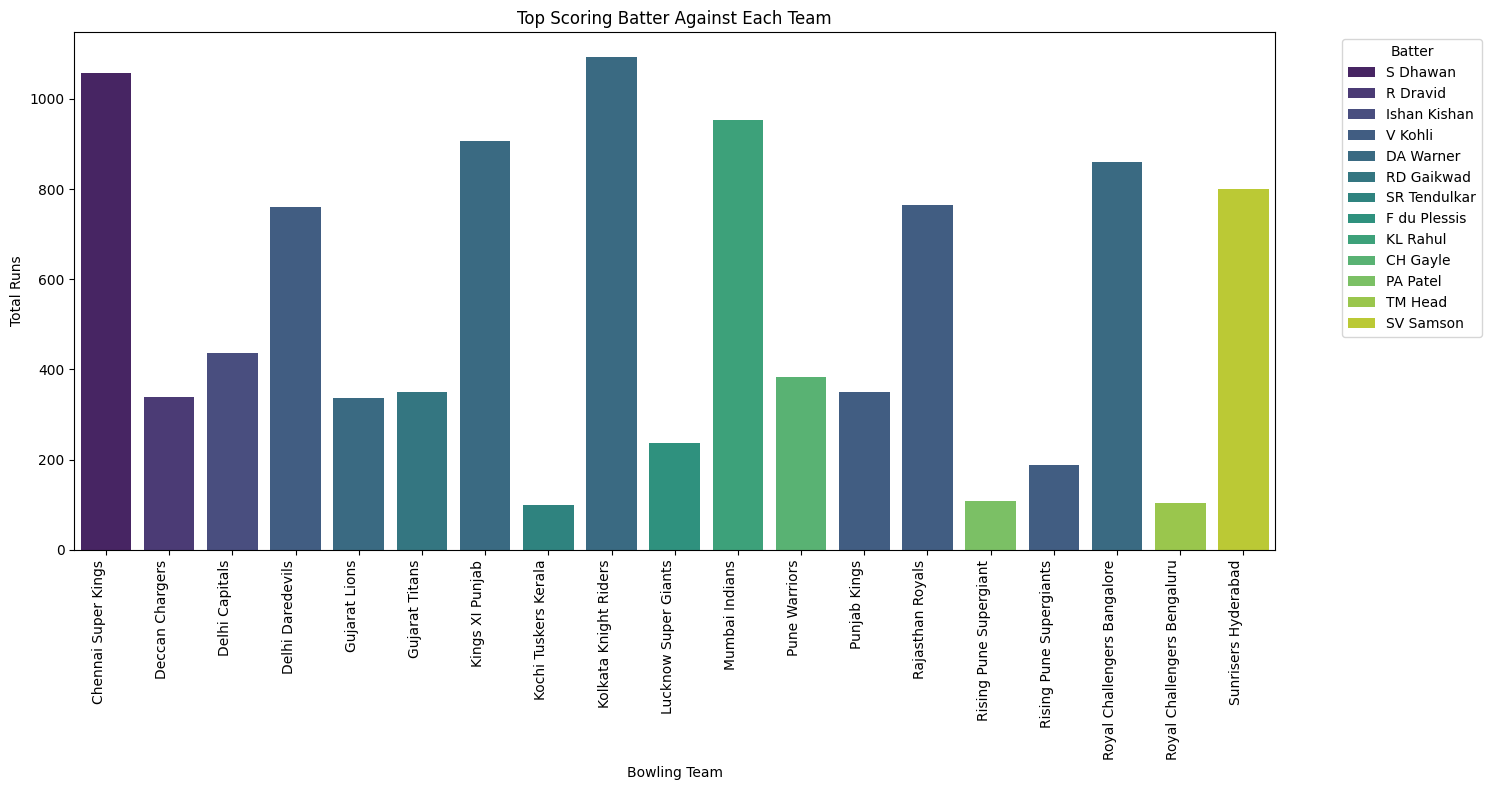

In [95]:
plt.figure(figsize=(15, 8))
sns.barplot(x='bowling_team', y='batsman_runs', data=top_scorers_against_each_team, hue='batter', palette='viridis', dodge=False)
plt.xlabel('Bowling Team')
plt.ylabel('Total Runs')
plt.title('Top Scoring Batter Against Each Team')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Batter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#11 Who are the most consistent run-scorers (average runs per innings)played more then 10 inning?

In [96]:
 #Total runs per batter
total_runs = data.groupby('batter')['batsman_runs'].sum()

# Number of innings played per batter
innings_count = data.groupby(['batter', 'match_id'])['inning'] \
                    .nunique() \
                    .groupby('batter') \
                    .count()

# Average runs per innings
avg_runs_per_innings = total_runs / innings_count

# Optional: consider only batters with at least 10 innings
avg_runs_per_innings = avg_runs_per_innings[innings_count >= 10]

# Top 10 most consistent batters
top_10_consistent = avg_runs_per_innings.sort_values(ascending=False).head(10)

print("Top 10 Most Consistent Run-Scorers (Average Runs per Innings):")
print(top_10_consistent)

Top 10 Most Consistent Run-Scorers (Average Runs per Innings):
batter
DP Conway          42.000000
B Sai Sudharsan    41.360000
KL Rahul           38.434426
LMP Simmons        37.206897
RD Gaikwad         36.615385
SE Marsh           36.072464
HM Amla            36.062500
DA Warner          35.690217
CH Gayle           35.439716
ML Hayden          34.593750
dtype: float64


## Calculate Average Runs Scored in Each Over of an Innings

In [97]:
# Calculate total runs per over for each innings
runs_per_over_innings = data.groupby(['inning', 'over'])['total_runs'].sum().reset_index()

# Calculate the average runs for each over across all innings
average_runs_per_over = runs_per_over_innings.groupby('over')['total_runs'].mean()

print("Average runs scored in each over of an innings:")
print(average_runs_per_over.head(10))

Average runs scored in each over of an innings:
over
0    2275.166667
1    8081.500000
2    8947.500000
3    9207.500000
4    9282.500000
5    9264.000000
6    7419.500000
7    7990.500000
8    8319.500000
9    8176.500000
Name: total_runs, dtype: float64


## Identify Most Productive Overs (Highest Average Runs per Ball)

In [98]:
# Calculate total runs scored in each over
total_runs_per_over = data.groupby('over')['total_runs'].sum()

# Calculate total balls bowled in each over (excluding extras that are not deliveries, like wides or no-balls where the ball is re-bowled, but counting all actual deliveries)
# For simplicity, we'll count each row as a ball for now.
total_balls_per_over = data.groupby('over')['ball'].count()

# Calculate average runs per ball for each over
average_runs_per_ball_per_over = (total_runs_per_over / total_balls_per_over).sort_values(ascending=False)

print("Overs with highest average runs per ball:")
print(average_runs_per_ball_per_over.head(10))

Overs with highest average runs per ball:
over
19    1.776855
18    1.646896
17    1.587839
16    1.498778
15    1.434273
14    1.393504
5     1.373055
4     1.369100
3     1.356538
13    1.343645
dtype: float64


## Identify Top 10 Finishers (Most Runs in Overs 16-20)

In [99]:
# Filter data for overs 16-20 (death overs)
death_overs_data = data[data['over'].isin(range(15, 20))] # Overs are 0-indexed, so 15-19 corresponds to 16-20

# Calculate total runs scored by each batter in death overs
death_overs_runs = death_overs_data.groupby('batter')['batsman_runs'].sum()

# Get the top 10 finishers
top_10_finishers = death_overs_runs.sort_values(ascending=False).head(10)

print("Top 10 Finishers (Most runs in overs 16-20):")
print(top_10_finishers)

Top 10 Finishers (Most runs in overs 16-20):
batter
MS Dhoni          3292
KA Pollard        2032
KD Karthik        1904
AB de Villiers    1868
RA Jadeja         1680
RG Sharma         1513
V Kohli           1469
AD Russell        1324
DA Miller         1298
HH Pandya         1290
Name: batsman_runs, dtype: int64


#Which players have the highest boundary percentage (boundaries/balls faced)?

In [100]:
# Boundary balls (4s and 6s)
boundaries = data[data['batsman_runs'].isin([4, 6])] \
                .groupby('batter') \
                .size()

# Legal balls faced (exclude wides)
balls_faced = data[data['extras_type'] != 'wide'] \
                .groupby('batter') \
                .size()

# Boundary percentage
boundary_percentage = (boundaries / balls_faced) * 100

# Filter batters with at least 50 balls faced
boundary_percentage = boundary_percentage[balls_faced >= 50]

# Top 10 boundary percentage players
top_10 = boundary_percentage.sort_values(ascending=False).head(10)

print("Top 10 players with highest boundary percentage:")
print(top_10)

Top 10 players with highest boundary percentage:
batter
J Fraser-McGurk    40.000000
LJ Wright          30.158730
PD Salt            28.051948
Kamran Akmal       26.923077
SP Narine          26.524390
Naman Dhir         26.190476
MJ Lumb            25.757576
WG Jacks           25.563910
TM Head            25.327511
AC Blizzard        25.274725
dtype: float64


## Identify Top Wicket-Takers

In [101]:
# Filter for wickets where 'is_wicket' is 1 and the dismissal is not 'run out'
wickets = data[data['is_wicket'] == 1]

# Exclude 'run out' dismissals as they are not credited to the bowler
wickets = wickets[wickets['dismissal_kind'] != 'run out']

# Group by bowler and count the number of wickets
wickets_per_bowler = wickets.groupby('bowler')['is_wicket'].count()

# Get the top 10 wicket-takers
top_10_wicket_takers = wickets_per_bowler.sort_values(ascending=False).head(10)

print("Top 10 Wicket-Takers:")
print(top_10_wicket_takers)

Top 10 Wicket-Takers:
bowler
YS Chahal     205
PP Chawla     192
DJ Bravo      183
R Ashwin      181
B Kumar       181
SP Narine     180
A Mishra      174
SL Malinga    170
JJ Bumrah     168
RA Jadeja     160
Name: is_wicket, dtype: int64


What is the economy rate of each bowler (runs conceded per over)?


In [102]:
# 1️ Legal balls bowled (exclude wides & no-balls)
legal_balls = data[~data['extras_type'].isin(['wide', 'noball'])] \
                .groupby('bowler')['ball'].count()

overs_bowled = legal_balls / 6


# 2️ Runs conceded by bowler
# (batsman runs + wides + no-balls count against bowler)

# Calculate batsman runs conceded by each bowler
batsman_runs_conceded = data.groupby('bowler')['batsman_runs'].sum()

# Calculate wide runs conceded by each bowler
wide_runs_conceded = data[data['extras_type'] == 'wide'].groupby('bowler')['extra_runs'].sum().fillna(0)

# Calculate noball runs conceded by each bowler
noball_runs_conceded = data[data['extras_type'] == 'noball'].groupby('bowler')['extra_runs'].sum().fillna(0)

# Combine all runs. Use .add(..., fill_value=0) to handle bowlers who might not have bowled all types of runs/extras
runs_conceded = batsman_runs_conceded.add(wide_runs_conceded, fill_value=0).add(noball_runs_conceded, fill_value=0)


# 3️ Economy Rate
economy_rate = runs_conceded / overs_bowled


# 4️ Filter bowlers with minimum 10 overs
min_overs = 10
economy_rate = economy_rate[overs_bowled >= min_overs].sort_values()


# 5️ Top 10 economical bowlers
print("Top 10 Bowlers with Best Economy Rate:")
print(economy_rate.head(10))

Top 10 Bowlers with Best Economy Rate:
bowler
SM Harwood         5.462687
Sohail Tanvir      5.569811
FH Edwards         5.760000
Mohammad Hafeez    5.809524
MJ Clarke          6.090909
JW Hastings        6.196721
A Chandila         6.205128
M Muralitharan     6.231499
M Pathirana        6.250497
SW Tait            6.258427
dtype: float64


Which bowlers have bowled the most dot balls?

In [103]:
# Identify dot balls (0 runs scored and no extras from wide or no-ball, as those are re-bowled and not 'dot' in the traditional sense)
dot_balls = data[(data['total_runs'] == 0) & (~data['extras_type'].isin(['wide', 'noball']))]

# Group by bowler and count the number of dot balls
dot_balls_per_bowler = dot_balls.groupby('bowler').size()

# Sort in descending order to find the top bowlers with most dot balls
top_10_dot_ball_bowlers = dot_balls_per_bowler.sort_values(ascending=False).head(10)

print("Top 10 Bowlers with Most Dot Balls:")
print(top_10_dot_ball_bowlers)

Top 10 Bowlers with Most Dot Balls:
bowler
B Kumar            1632
SP Narine          1569
R Ashwin           1552
PP Chawla          1325
Harbhajan Singh    1263
JJ Bumrah          1228
RA Jadeja          1216
YS Chahal          1194
UT Yadav           1186
A Mishra           1185
dtype: int64


Who are the most expensive bowlers (highest economy rate)?

In [104]:
# Display the top 10 bowlers with the highest economy rate
print("Top 10 Bowlers with Highest Economy Rate:")
print(economy_rate.sort_values(ascending=False).head(10))

Top 10 Bowlers with Highest Economy Rate:
bowler
R Shepherd         11.142857
OF Smith           10.926316
P Amarnath         10.727273
TP Sudhindra       10.702703
Akash Deep         10.560000
S Narwal           10.353982
MJ Henry           10.171429
V Sehwag           10.130435
Arshad Khan        10.117647
Gagandeep Singh    10.071429
dtype: float64


What is the most common type of dismissal caused by each bowler?

In [105]:
# Filter for wickets (where 'is_wicket' is 1) and exclude 'run out' dismissals
wickets_by_bowler = data[(data['is_wicket'] == 1) & (data['dismissal_kind'] != 'run out')]

# Group by bowler and dismissal kind, then count the occurrences
dismissal_counts = wickets_by_bowler.groupby(['bowler', 'dismissal_kind']).size().reset_index(name='count')

# Find the most common dismissal kind for each bowler
# Corrected: Use idxmax() to get the index of the maximum count within each bowler group
most_common_dismissal = dismissal_counts.loc[dismissal_counts.groupby('bowler')['count'].idxmax()]

print("Most common type of dismissal caused by each bowler:")
print(most_common_dismissal.head(10))

Most common type of dismissal caused by each bowler:
            bowler     dismissal_kind  count
1   A Ashish Reddy             caught      8
4         A Badoni             caught      1
7       A Chandila  caught and bowled      5
9      A Choudhary             caught      5
10      A Flintoff             caught      1
12        A Kamboj             bowled      2
14        A Kumble             caught     24
19        A Mishra             caught    102
24        A Mithun             caught      5
26         A Nehra             caught     76


Which bowlers perform best in death overs (overs 16–20)?

In [106]:
# Wickets (exclude run-outs)
wickets = death_overs_data[
    (death_overs_data['is_wicket'] == 1) &
    (death_overs_data['dismissal_kind'] != 'run out')
].groupby('bowler').size()

# Runs conceded
runs = death_overs_data.groupby('bowler')['total_runs'].sum()

# Overs bowled (legal balls only)
overs = death_overs_data[
    ~death_overs_data['extras_type'].isin(['wide', 'noball'])
].groupby('bowler')['ball'].count() / 6

# Economy rate (min 5 overs)
economy = (runs / overs)[overs >= 5]

# Combine performance
performance = pd.DataFrame({
    'Wickets': wickets,
    'EconomyRate': economy
}).dropna()

# Top 10 death-over bowlers
top_bowlers = performance.sort_values(
    ['EconomyRate', 'Wickets'],
    ascending=[True, False]
).head(10)

print(top_bowlers)

                 Wickets  EconomyRate
bowler                               
KMDN Kulasekara      2.0     6.400000
S Gopal              6.0     6.750000
Sohail Tanvir       16.0     6.841121
R Tewatia            4.0     7.173913
SH Johnson           2.0     7.354839
DE Bollinger        23.0     7.363636
SP Narine           73.0     7.396552
A Kumble            17.0     7.482759
M Theekshana         8.0     7.541284
Shahbaz Ahmed        4.0     7.548387


Which team has scored the most total runs overall?


In [107]:
total_runs_per_team = data.groupby('batting_team')['total_runs'].sum()

# Sort in descending order to find the team with the most runs
most_runs_team = total_runs_per_team.sort_values(ascending=False).head(10)

print("Top 10 Teams with Most Total Runs Overall:")
print(most_runs_team)

Top 10 Teams with Most Total Runs Overall:
batting_team
Mumbai Indians                 42176
Kolkata Knight Riders          39331
Chennai Super Kings            38629
Royal Challengers Bangalore    37692
Rajasthan Royals               34747
Kings XI Punjab                30064
Sunrisers Hyderabad            29071
Delhi Daredevils               24296
Delhi Capitals                 14900
Deccan Chargers                11463
Name: total_runs, dtype: int64


/tmp/ipython-input-3070686679.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_runs_team.index, y=most_runs_team.values, palette='viridis')


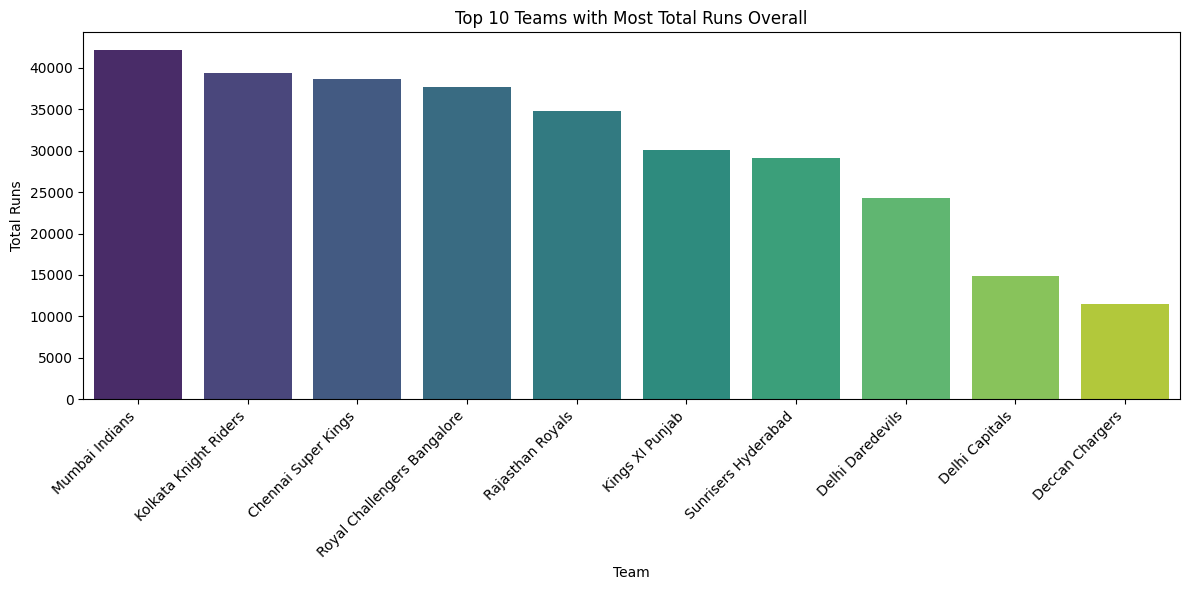

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=most_runs_team.index, y=most_runs_team.values, palette='viridis')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.title('Top 10 Teams with Most Total Runs Overall')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Which team has conceded the fewest runs overall?

In [109]:
runs_conceded_per_team = data.groupby('bowling_team')['total_runs'].sum()

# Sort in ascending order to find the team that conceded the fewest runs
fewest_runs_team = runs_conceded_per_team.sort_values(ascending=True).head(10)

print("Top 10 Teams with Fewest Total Runs Conceded Overall:")
print(fewest_runs_team)

Top 10 Teams with Fewest Total Runs Conceded Overall:
bowling_team
Kochi Tuskers Kerala            1986
Rising Pune Supergiants         2113
Rising Pune Supergiant          2436
Royal Challengers Bengaluru     2820
Gujarat Lions                   5090
Pune Warriors                   6857
Lucknow Super Giants            7415
Gujarat Titans                  7475
Punjab Kings                    9545
Deccan Chargers                11618
Name: total_runs, dtype: int64


What is the average team total per innings?

In [110]:
# Calculate total runs scored in each innings of each match
innings_totals = data.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()

# Calculate the average of these inning totals
average_team_total_per_innings = innings_totals['total_runs'].mean()

print(f"The average team total per innings is: {average_team_total_per_innings:.2f}")

The average team total per innings is: 156.86


Which teams score the most runs in the powerplay (overs 1–6)?

In [111]:
# Filter data for powerplay overs (0-5, as 'over' column is 0-indexed)
powerplay_data = data[data['over'].isin(range(0, 6))]

# Group by batting team and sum total runs in powerplay
powerplay_runs = powerplay_data.groupby('batting_team')['total_runs'].sum()

# Sort in descending order to find the top teams
top_powerplay_teams = powerplay_runs.sort_values(ascending=False).head(10)

print("Top 10 Teams with Most Runs in Powerplay (Overs 1-6):")
print(top_powerplay_teams)

Top 10 Teams with Most Runs in Powerplay (Overs 1-6):
batting_team
Mumbai Indians                 12225
Kolkata Knight Riders          11941
Chennai Super Kings            10991
Royal Challengers Bangalore    10919
Rajasthan Royals               10226
Kings XI Punjab                 8954
Sunrisers Hyderabad             8937
Delhi Daredevils                7360
Delhi Capitals                  4709
Deccan Chargers                 3417
Name: total_runs, dtype: int64


Which teams score the most runs in the death overs (16–20)?


In [112]:
# Filter data for death overs (16-20), assuming 'over' is 0-indexed (so 15-19)
death_overs_data = data[data['over'].isin(range(15, 20))]

# Group by batting team and sum total runs in death overs
death_overs_runs = death_overs_data.groupby('batting_team')['total_runs'].sum()

# Sort in descending order to find the top teams
top_death_overs_teams = death_overs_runs.sort_values(ascending=False).head(10)

print("Top 10 Teams with Most Runs in Death Overs (16-20):")
print(top_death_overs_teams)

Top 10 Teams with Most Runs in Death Overs (16-20):
batting_team
Mumbai Indians                 11889
Chennai Super Kings            11094
Royal Challengers Bangalore    10514
Kolkata Knight Riders          10123
Rajasthan Royals                9133
Kings XI Punjab                 7875
Sunrisers Hyderabad             7672
Delhi Daredevils                6272
Delhi Capitals                  3907
Deccan Chargers                 3133
Name: total_runs, dtype: int64


Which team has hit the most sixes?

In [113]:
# Filter for deliveries where 6 runs were scored
sixes = data[data['batsman_runs'] == 6]

# Group by batting team and count the number of sixes
sixes_per_team = sixes.groupby('batting_team').size()

# Sort in descending order to find the team with the most sixes
most_sixes_team = sixes_per_team.sort_values(ascending=False).head(10)

print("Top 10 Teams with Most Sixes:")
print(most_sixes_team)

Top 10 Teams with Most Sixes:
batting_team
Mumbai Indians                 1685
Chennai Super Kings            1509
Kolkata Knight Riders          1495
Royal Challengers Bangalore    1488
Rajasthan Royals               1237
Kings XI Punjab                1075
Sunrisers Hyderabad            1042
Delhi Daredevils                801
Delhi Capitals                  550
Punjab Kings                    440
dtype: int64


/tmp/ipython-input-2738662860.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_sixes_team.index, y=most_sixes_team.values, palette='rocket')


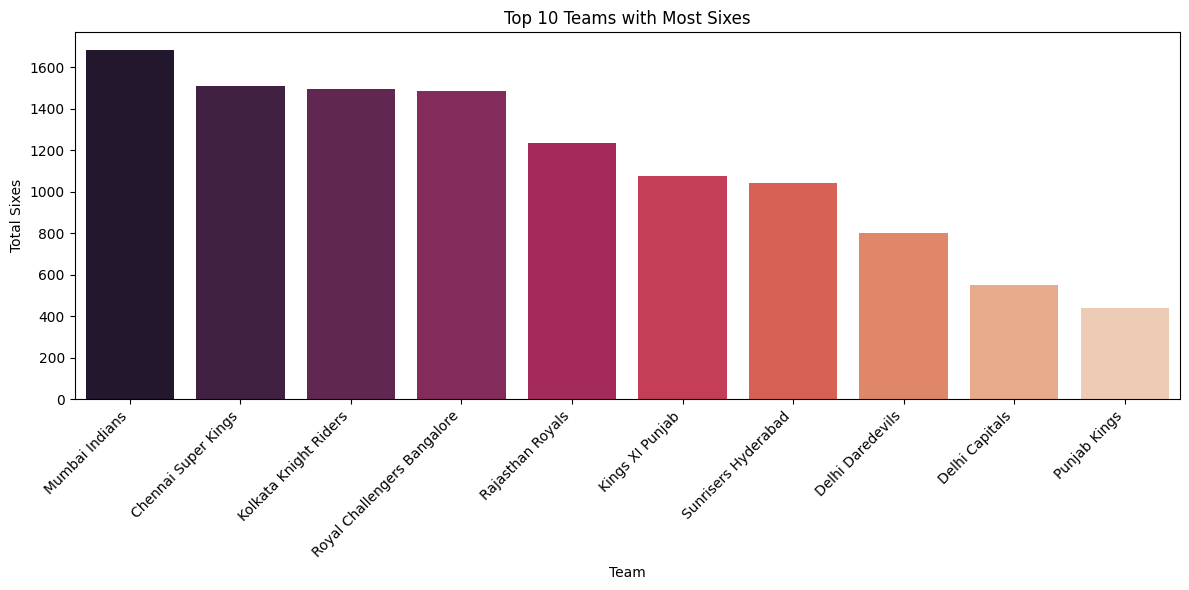

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=most_sixes_team.index, y=most_sixes_team.values, palette='rocket')
plt.xlabel('Team')
plt.ylabel('Total Sixes')
plt.title('Top 10 Teams with Most Sixes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Which team gives away the most extras (byes, wides, no-balls)?


In [115]:
extras_per_team = data.groupby('bowling_team')['extra_runs'].sum()
print("Total Extra Runs Conceded by Each Bowling Team:")
print(extras_per_team.sort_values(ascending=False).head(10))

Total Extra Runs Conceded by Each Bowling Team:
bowling_team
Mumbai Indians                 2295
Royal Challengers Bangalore    2040
Kolkata Knight Riders          1957
Rajasthan Royals               1917
Chennai Super Kings            1842
Kings XI Punjab                1571
Delhi Daredevils               1268
Sunrisers Hyderabad            1254
Delhi Capitals                  725
Deccan Chargers                 659
Name: extra_runs, dtype: int64


What’s the total number of wickets fallen by each team?


## Total Wickets Fallen by Each Team

In [116]:
# Filter for wickets (where 'is_wicket' is 1)
wickets_fallen = data[data['is_wicket'] == 1]

# Group by batting team and count the number of wickets
wickets_per_team = wickets_fallen.groupby('batting_team').size()

# Sort in descending order to find teams with most wickets fallen
total_wickets_fallen_per_team = wickets_per_team.sort_values(ascending=False)

print("Total Wickets Fallen by Each Team:")
print(total_wickets_fallen_per_team.head(10))

Total Wickets Fallen by Each Team:
batting_team
Mumbai Indians                 1573
Kolkata Knight Riders          1491
Royal Challengers Bangalore    1384
Rajasthan Royals               1312
Chennai Super Kings            1245
Kings XI Punjab                1158
Sunrisers Hyderabad            1058
Delhi Daredevils                952
Delhi Capitals                  570
Deccan Chargers                 484
dtype: int64


Which matches had the highest total runs scored?


## Matches with the Highest Total Runs Scored

In [117]:
# Calculate total runs scored in each match
match_total_runs = data.groupby('match_id')['total_runs'].sum()

# Sort in descending order to find matches with the highest total runs
highest_total_runs_matches = match_total_runs.sort_values(ascending=False).head(10)

print("Matches with the highest total runs scored:")
print(highest_total_runs_matches)

Matches with the highest total runs scored:
match_id
1426268    549
1422126    523
1426280    523
1426281    504
419137     469
1426273    465
1136604    459
1359512    458
1082641    453
1216527    449
Name: total_runs, dtype: int64


What is the average run rate per over across all innings


## Average Run Rate Per Over Across All Innings

In [118]:
# Calculate average run rate per over (average runs per ball * 6)
average_run_rate_per_over = average_runs_per_ball_per_over * 6

print("Average run rate per over across all innings:")
print(average_run_rate_per_over.sort_values(ascending=False).head(10))

Average run rate per over across all innings:
over
19    10.661132
18     9.881378
17     9.527034
16     8.992669
15     8.605637
14     8.361026
5      8.238328
4      8.214602
3      8.139227
13     8.061871
dtype: float64


Are more runs scored in the first or second innings?

## Comparison of Runs Scored in First vs. Second Innings

In [119]:
# Calculate total runs for each inning
runs_per_inning = data.groupby('inning')['total_runs'].sum()

print("Total runs scored per inning:")
print(runs_per_inning)

# Compare the runs in the first and second innings
first_innings_runs = runs_per_inning.get(1, 0) # Get runs for inning 1, default to 0 if not found
second_innings_runs = runs_per_inning.get(2, 0) # Get runs for inning 2, default to 0 if not found

if first_innings_runs > second_innings_runs:
    print(f"\nMore runs are scored in the first innings with {first_innings_runs} runs compared to {second_innings_runs} in the second innings.")
elif second_innings_runs > first_innings_runs:
    print(f"\nMore runs are scored in the second innings with {second_innings_runs} runs compared to {first_innings_runs} in the first innings.")
else:
    print("\nThe total runs scored in the first and second innings are equal.")


Total runs scored per inning:
inning
1    181274
2    166196
3       137
4       123
5        11
6        15
Name: total_runs, dtype: int64

More runs are scored in the first innings with 181274 runs compared to 166196 in the second innings.


How many wickets fall on average in powerplay vs middle vs death overs?

In [120]:
# Over phases
phases = {
    "Powerplay": range(0, 6),
    "Middle": range(6, 15),
    "Death": range(15, 20)
}

# Actual wickets (exclude run-outs)
actual_wickets = data[
    (data['is_wicket'] == 1) & (data['dismissal_kind'] != 'run out')
]

total_matches = data['match_id'].nunique()

for name, overs in phases.items():
    wickets = actual_wickets[actual_wickets['over'].isin(overs)]
    innings = data[data['over'].isin(overs)][['match_id', 'inning']].drop_duplicates().shape[0]

    print(f"\n{name} Overs")
    print(f"Avg wickets per innings: {len(wickets) / innings:.2f}")
    print(f"Avg wickets per match: {len(wickets) / total_matches:.2f}")


Powerplay Overs
Avg wickets per innings: 1.34
Avg wickets per match: 2.72

Middle Overs
Avg wickets per innings: 2.14
Avg wickets per match: 4.26

Death Overs
Avg wickets per innings: 2.02
Avg wickets per match: 3.83


Which bowlers have dismissed a specific batter the most times?

In [122]:
top_dismissals = (
    data[(data['is_wicket'] == 1) & (data['dismissal_kind'] != 'run out')]
    .groupby(['bowler', 'player_dismissed'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head(10)
)

print(top_dismissals)

              bowler player_dismissed  count
7995       SP Narine        RG Sharma      8
3382       JJ Bumrah          RR Pant      7
8242  Sandeep Sharma          V Kohli      7
6347        R Ashwin       RV Uthappa      7
1107         B Kumar        AM Rahane      7
154         A Mishra        RG Sharma      7
9333          Z Khan         MS Dhoni      7
5043       MM Sharma        AT Rayudu      7
9310          Z Khan        G Gambhir      6
9162       YS Chahal       MA Agarwal      6
